In [1]:
import os
os.chdir('../py')

import pandas as pd
import numpy as np
import feather

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.preprocessing import LabelEncoder

# my modules
import EDA
import utils

In [42]:
DIR = '../input/feather/'

train = feather.read_dataframe(DIR + 'train.ftr')
test  = feather.read_dataframe(DIR + 'test.ftr')

In [50]:
tmp = train.groupby('ProductCD')['isFraud'].agg(['mean']).reset_index()

In [55]:
tmp.index = tmp['ProductCD'].values

In [56]:
tmp

,ProductCD,mean
C,C,0.116873
H,H,0.047662
R,R,0.037826
S,S,0.058996
W,W,0.020399


In [57]:
tmp['mean'].to_dict()

{'C': 0.11687269224594637,
 'H': 0.04766230620155039,
 'R': 0.03782593702750736,
 'S': 0.058995528035775714,
 'W': 0.020399390451929858}

In [58]:
list(train)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [6]:
drop_col = [col for col in train.columns if not 'card' in col]

In [8]:
drop_col.remove('isFraud')

In [9]:
train.drop(columns=drop_col, inplace=True)
test.drop(columns=drop_col, inplace=True)

In [11]:
train.isnull().sum()

isFraud       0
card1         0
card2      8933
card3      1565
card4      1577
card5      4259
card6      1571
dtype: int64

In [12]:
train['card4'] = train['card4'].astype('category')

In [16]:
train['card6'].dtype

dtype('O')

In [19]:
train['card4'].dtypes == 'category'

True

In [13]:
train.dtypes

isFraud        int8
card1         int16
card2       float32
card3       float32
card4      category
card5       float32
card6        object
dtype: object

In [10]:
train.head()

,isFraud,card1,card2,card3,card4,card5,card6
0,0,13926,NaN,150.0,discover,142.0,credit
1,0,2755,404.0,150.0,mastercard,102.0,credit
2,0,4663,490.0,150.0,visa,166.0,debit
3,0,18132,567.0,150.0,mastercard,117.0,debit
4,0,4497,514.0,150.0,mastercard,102.0,credit


In [22]:
for c in ['card1', 'card2', 'card3', 'card5']:
    train[c].fillna(-9999, inplace=True)
    train[c] = train[c].astype('object')

In [24]:
train['card4'] = train['card4'].astype('object')

In [26]:
train['full_card'] = train['card1'].astype('str') + train['card2'].astype('str') + train['card3'].astype('str') + train['card4'] + train['card5'].astype('str') + train['card6']

In [27]:
train.head()

,isFraud,card1,card2,card3,card4,card5,card6,full_card
0,0,13926,-9999,150,discover,142,credit,13926-9999.0150.0discover142.0credit
1,0,2755,404,150,mastercard,102,credit,2755404.0150.0mastercard102.0credit
2,0,4663,490,150,visa,166,debit,4663490.0150.0visa166.0debit
3,0,18132,567,150,mastercard,117,debit,18132567.0150.0mastercard117.0debit
4,0,4497,514,150,mastercard,102,credit,4497514.0150.0mastercard102.0credit


In [29]:
train['card1'].nunique()

13553

In [28]:
train['full_card'].nunique()

14210

In [32]:
train.head(20)

,isFraud,card1,card2,card3,card4,card5,card6,full_card
0,0,13926,-9999,150,discover,142,credit,13926-9999.0150.0discover142.0credit
1,0,2755,404,150,mastercard,102,credit,2755404.0150.0mastercard102.0credit
2,0,4663,490,150,visa,166,debit,4663490.0150.0visa166.0debit
3,0,18132,567,150,mastercard,117,debit,18132567.0150.0mastercard117.0debit
4,0,4497,514,150,mastercard,102,credit,4497514.0150.0mastercard102.0credit
5,0,5937,555,150,visa,226,debit,5937555.0150.0visa226.0debit
6,0,12308,360,150,visa,166,debit,12308360.0150.0visa166.0debit
7,0,12695,490,150,visa,226,debit,12695490.0150.0visa226.0debit
8,0,2803,100,150,visa,226,debit,2803100.0150.0visa226.0debit
9,0,17399,111,150,mastercard,224,debit,17399111.0150.0mastercard224.0debit


In [38]:
pd.Series(np.where(train['card1'].isin(train['card1'].value_counts()), train['card1'], np.nan)).unique()

array([nan, 1790, 1085, 3166, 1257, 1587, 6773, 1167, 1219, 1461, 7091,
       4209, 1767, 1183, 4614, 1567, 1308, 2686, 7945, 1110, 2632, 5172,
       1722, 1364, 6141, 6771, 5129, 2080, 1503, 2792, 2714, 3977, 1027,
       1523, 2067, 2578, 3748, 10361, 1429, 1998, 1277, 2604, 3929, 5334,
       4410, 1799, 1051, 1116, 1186, 1060, 2891, 10344, 2062, 1267, 2774,
       1651, 1013, 1321, 1008, 1569, 1112, 2818, 14932, 3873, 1024, 1383,
       1108, 2522, 2505, 1538, 3006, 1509, 1014, 1947], dtype=object)

In [41]:
train[train['card1'] == 1085]

,isFraud,card1,card2,card3,card4,card5,card6,full_card
205,0,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
2968,0,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
4265,0,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
5252,0,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
6411,0,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
7121,1,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
7123,1,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
7126,1,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
10669,0,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit
11425,0,1085,500,185,mastercard,219,credit,1085500.0185.0mastercard219.0credit


In [35]:
train['card1'].value_counts()

7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
12695     7091
12544     6773
6019      6771
2803      6141
7585      5334
10616     5172
12839     5129
3154      4614
2616      4410
18132     4209
9633      4158
15497     3977
16132     3929
2884      3873
16075     3748
11207     3693
10112     3560
7508      3490
10057     3166
12501     3152
7826      3006
16659     2988
12577     2891
5812      2818
7664      2792
         ...  
9111         1
9115         1
9123         1
9130         1
9140         1
9143         1
9145         1
9146         1
9031         1
9028         1
8923         1
9027         1
8934         1
8950         1
8957         1
8958         1
8967         1
8975         1
8979         1
8982         1
8990         1
8996         1
8999         1
9000         1
9001         1
9007         1
9012         1
9019         1
9024         1
1000         1
Name: card1, Length: 13553, dtype: int64

In [74]:
pd.read_pickle('../input/pickle/test_df.pkl').shape

(506691, 791)

In [72]:
EDA.max_disp(pd.read_pickle('../input/pickle/test_df.pkl').head())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,DT,DT_M,DT_W,DT_D,DT_hour,DT_day_week,DT_day_month,is_december,is_holiday,DT_M_total,DT_W_total,DT_D_total,uid,uid2,uid3,uid4,uid5,card1_fq_enc,card2_fq_enc,card3_fq_enc,card5_fq_enc,uid_fq_enc,uid2_fq_enc,uid3_fq_enc,uid4_fq_enc,uid5_fq_enc,bank_type,card3_DT_D_hour_dist,card3_DT_W_week_day_dist,card3_DT_M_month_day_dist,card3_DT_D_hour_dist_best,card3_DT_W_week_day_dist_best,card3_DT_M_month_day_dist_best,card5_DT_D_hour_dist,card5_DT_W_week_day_dist,card5_DT_M_month_day_dist,card5_DT_D_hour_dist_best,card5_DT_W_week_day_dist_best,card5_DT_M_month_day_dist_best,bank_type_DT_D_hour_dist,bank_type_DT_W_week_day_dist,bank_type_DT_M_month_day_dist,bank_type_DT_D_hour_dist_best,bank_type_DT_W_week_day_dist_best,bank_type_DT_M_month_day_dist_best,bank_type_DT_M,bank_type_DT_W,bank_type_DT_D,uid_D1_mean,uid_D1_std,uid2_D1_mean,uid2_D1_std,uid3_D1_mean,uid3_D1_std,uid4_D1_mean,uid4_D1_std,uid5_D1_mean,uid5_D1_std,bank_type_D1_mean,bank_type_D1_std,uid_D2_mean,uid_D2_std,uid2_D2_mean,uid2_D2_std,uid3_D2_mean,uid3_D2_std,uid4_D2_mean,uid4_D2_std,uid5_D2_mean,uid5_D2_std,bank_type_D2_mean,bank_type_D2_std,uid_D3_mean,uid_D3_std,uid2_D3_mean,uid2_D3_std,uid3_D3_mean,uid3_D3_std,uid4_D3_mean,uid4_D3_std,uid5_D3_mean,uid5_D3_std,bank_type_D3_mean,bank_type_D3_std,uid_D4_mean,uid_D4_std,uid2_D4_mean,uid2_D4_std,uid3_D4_mean,uid3_D4_std,uid4_D4_mean,uid4_D4_std,uid5_D4_mean,uid5_D4_std,bank_type_D4_mean,bank_type_D4_std,uid_D5_mean,uid_D5_std,uid2_D5_mean,uid2_D5_std,uid3_D5_mean,uid3_D5_std,uid4_D5_mean,uid4_D5_std,uid5_D5_mean,uid5_D5_std,bank_type_D5_mean,bank_type_D5_std,uid_D6_mean,uid_D6_std,uid2_D6_mean,uid2_D6_std,uid3_D6_mean,uid3_D6_std,uid4_D6_mean,uid4_D6_std,uid5_D6_mean,uid5_D6_std,bank_type_D6_mean,bank_type_D6_std,uid_D7_mean,uid_D7_std,uid2_D7_mean,uid2_D7_std,uid3_D7_mean,uid3_D7_std,uid4_D7_mean,uid4_D7_std,uid5_D7_mean,uid5_D7_std,bank_type_D7_mean,bank_type_D7_std,uid_D8_mean,uid_D8_std,uid2_D8_mean,uid2_D8_std,uid3_D8_mean,uid3_D8_std,uid4_D8_mean,uid4_D8_std,uid5_D8_mean,uid5_D8_std,bank_type_D8_mean,bank_type_D8_std,uid_D9_mean,uid_D9_std,uid2_D9_mean,uid2_D9_std,uid3_D9_mean,uid3_D9_std,uid

In [64]:
pd.read_pickle('../input/pickle/train_df.pkl').head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_38,DeviceType,DeviceInfo,id_33_0,id_33_1,DeviceInfo_device,DeviceInfo_version,id_30_device,id_30_version,id_31_device
0,2987000,0,86400,4.241327,0.020820,13926.0,NaN,150.0,9524.0,142.0,...,NaN,2,377418,NaN,NaN,377418,377418,377418,377418,377418
1,2987001,0,86401,3.401197,0.020820,2755.0,404.0,150.0,347386.0,102.0,...,NaN,2,377418,NaN,NaN,377418,377418,377418,377418,377418
2,2987002,0,86469,4.094345,0.020820,4663.0,490.0,150.0,719649.0,166.0,...,NaN,2,377418,NaN,NaN,377418,377418,377418,377418,377418
3,2987003,0,86499,3.931826,0.020820,18132.0,567.0,150.0,347386.0,117.0,...,NaN,2,377418,NaN,NaN,377418,377418,377418,377418,377418
4,2987004,0,86506,3.931826,0.045116,4497.0,514.0,150.0,347386.0,102.0,...,1.0,1,9,2220.0,1080.0,304,9,5668,2686,1562


In [65]:
pd.read_pickle('../input/pickle/train_df.pkl').shape

(417559, 791)

In [73]:
pd.read_pickle('../input/pickle/test_df.pkl')['isFraud'].value_counts()

0    86212
1     3114
Name: isFraud, dtype: int64

In [63]:
feather.read_dataframe('../input/feather/test.ftr').shape

(506691, 433)

In [71]:
feather.read_dataframe('../input/feather/test.ftr').head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950001,W,10409,111.0,150.0,visa,226.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
3,3663552,18403310,284.950012,W,10989,360.0,150.0,visa,166.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
4,3663553,18403317,67.949997,W,18018,452.0,150.0,mastercard,117.0,debit,...,None,NaN,None,None,None,None,None,None,None,None


In [66]:
pd.read_csv('../input/sample_submission.csv.zip').shape

(506691, 2)

In [67]:
pd.read_csv('../input/sample_submission.csv.zip').head()

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


In [68]:
feather.read_dataframe('../input/feather/train.ftr').shape

(590540, 434)

In [69]:
417559 + 89326

506885

In [2]:
imp = pd.read_csv('./LOG/imp/csv/imp_919_kernel_base.py.csv')

In [3]:
imp.head()

,feature,gain,fold
0,TransactionAmt,1832,1
1,ProductCD,540,1
2,card1,3362,1
3,card2,2362,1
4,card3,62,1


In [20]:
order = imp.groupby('feature').agg({'gain': 'mean'}).sort_values('gain', ascending=False).head(300).index

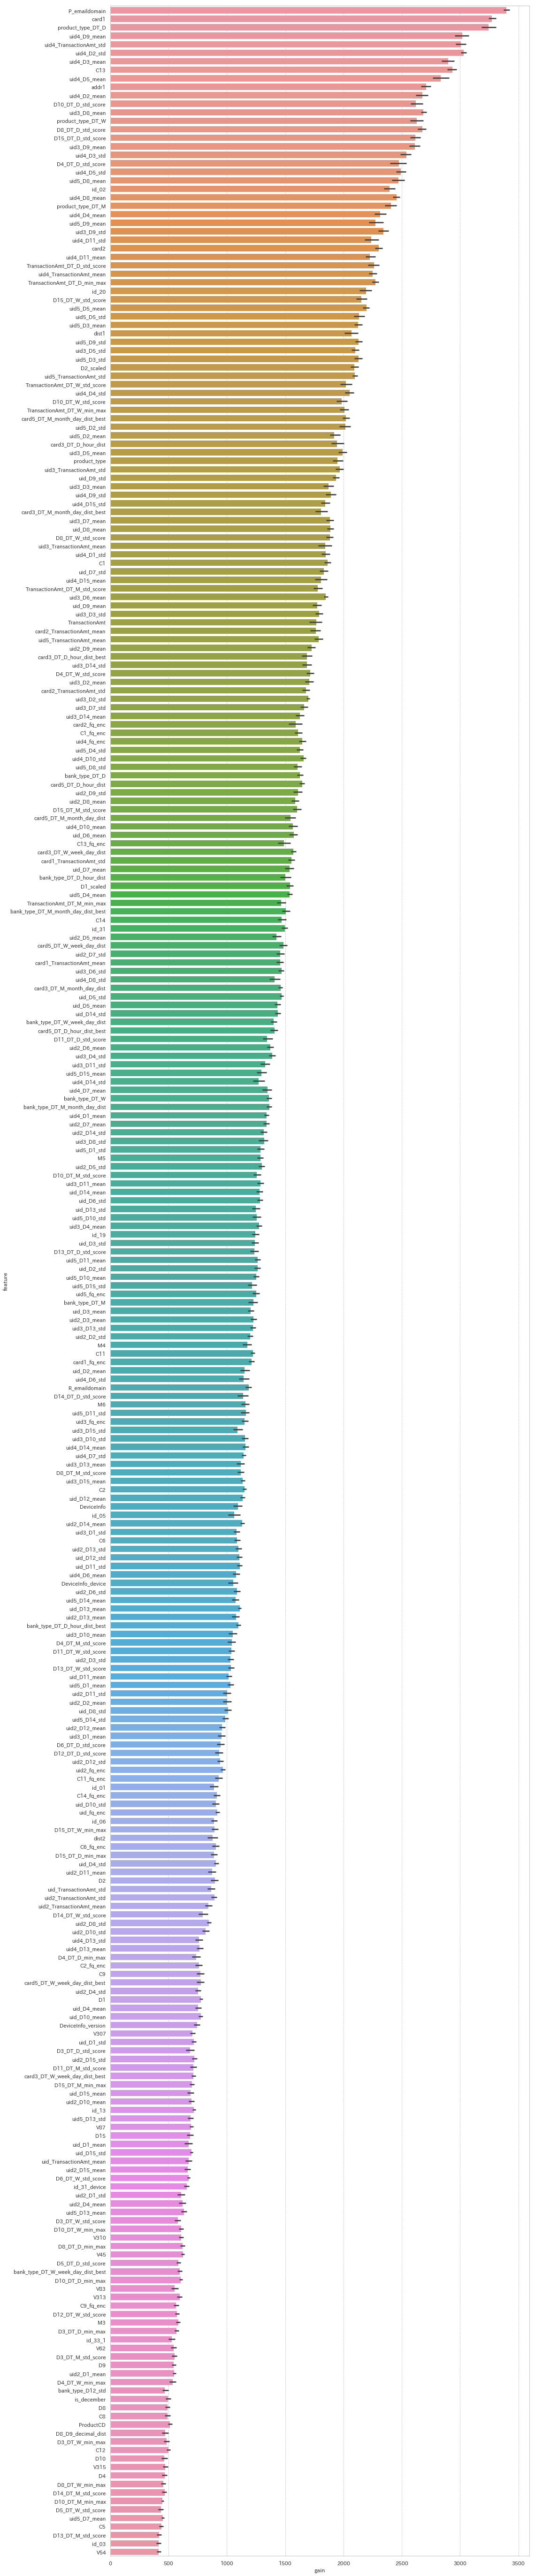

In [21]:
plt.figure(figsize=(16, 300/3))
sns.barplot(x='gain', y='feature', data=imp[imp['feature'].isin(order)].sort_values('gain', ascending=False))
plt.savefig('./LOG/imp/imp_919_kernel_base.py.png')
plt.show()

In [6]:
imp.groupby('feature').agg({'gain': 'mean'}).sort_values('gain', ascending=False)

,gain
feature,
P_emaildomain,3397.375
card1,3273.125
product_type_DT_D,3245.250
uid4_D2_std,3031.250
uid4_D9_mean,3018.750
uid4_TransactionAmt_std,3005.250
C13,2933.000
uid4_D3_mean,2896.875
uid4_D5_mean,2834.750


In [24]:
imp = pd.read_csv('./LOG/imp/csv/imp_920_experiment_parameter.py.csv')

In [25]:
imp.head()

,feature,gain,fold
0,TransactionAmt,243,1
1,ProductCD,44,1
2,card1,485,1
3,card2,355,1
4,card3,4,1


In [ ]:
def save_importances(importances):
    if len(importances['feaure'].nunique()) > 300:
        order = importances.agg({'gain': 'mean'}).sort_values('gain', ascending=False).head(300).index
        plt.figure(figsize=(16, len(order) / 3))
        sns.barplot(x='gain',
                    y='feature',
                    data=importances[importances['feature'].isin(order)].sort_values('gain', ascending=False))
        plt.savefig(f'LOG/imp/PNG/imp_{__file__}.png', dpi=200, bbox_inches="tight", pad_inches=0.1)
    else:
        plt.figure(figsize=(16, int(len(importances) / 3)))
        sns.barplot(x='gain', y='feature', data=importances.sort_values('gain', ascending=False))
        plt.savefig(f'LOG/imp/PNG/imp_{__file__}.png', dpi=200, bbox_inches="tight", pad_inches=0.1)
        
    return

In [26]:
order = imp.groupby('feature').agg({'gain': 'mean'}).sort_values('gain', ascending=False).head(300).index

plt.figure(figsize=(16, 300/3))
sns.barplot(x='gain', y='feature', data=imp[imp['feature'].isin(order)].sort_values('gain', ascending=False))
plt.savefig('./LOG/imp/PNG/imp_920_experiment_parameter.py.png')
plt.show()

In [28]:
imp = pd.read_csv('./LOG/imp/csv/imp_918_kernel_idea.py.csv')

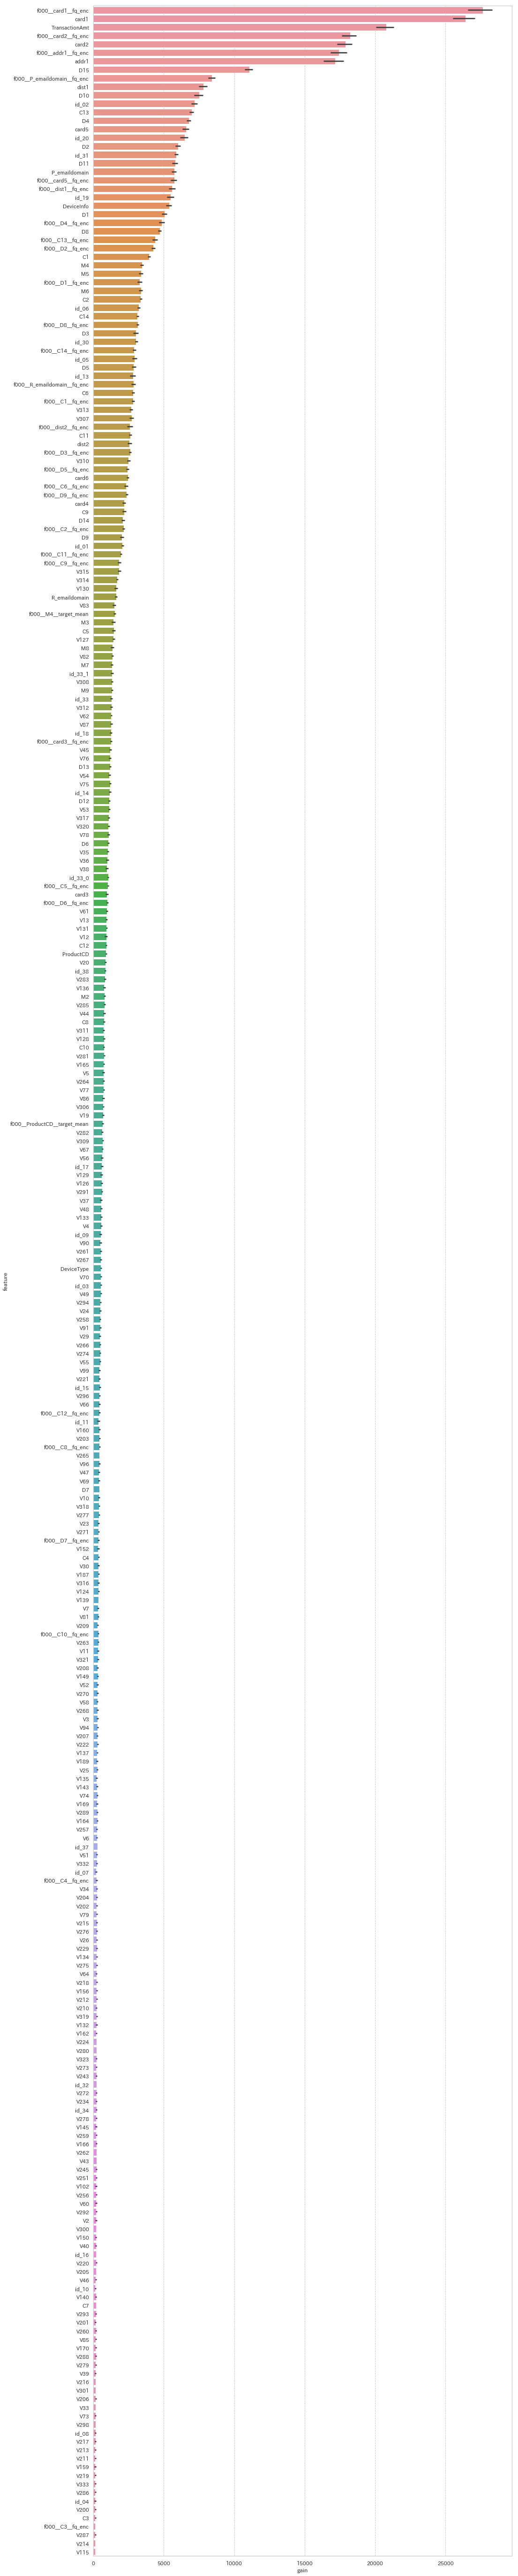

In [29]:
order = imp.groupby('feature').agg({'gain': 'mean'}).sort_values('gain', ascending=False).head(300).index

plt.figure(figsize=(16, 300/3))
sns.barplot(x='gain', y='feature', data=imp[imp['feature'].isin(order)].sort_values('gain', ascending=False))
# plt.savefig('./LOG/imp/PNG/imp_920_experiment_parameter.py.png')
plt.show()